In [1]:
#imports numpy library
#imports pandas library
#imports LabelEncoder class from the sklearn.preprocessing module
#imports matplotlib.pyplot module
#imports nltk package, which provides resources for natural language processing
#imports Seaborn data visualization library
#imports PorterStemmer to avoid the stemming
#imports the stopwords module from the nltk.corpus package.
#imports built-in string module in Python.
#imports the WordCloud class from the wordcloud package
#Imports counter
#imports classes for vectorizing text data into numerical feature vectors
#imports function to split a dataset into training and testing sets
#imports decision tree algorithm for classification tasks
#imports random forest algorithm for classification tasks
#imports GaussianNB, MultinomialNB and BernoulliNB from sklearn.naive_bayes

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
#reading the dataset
df = pd.read_csv('SMS Spam Collection.csv', encoding='ISO-8859-1')

In [3]:
#checking the data head
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [4]:
#Three unnamed columns are there which need to be dropped
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
#checking the data head after dropping the columns
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Changing the column names
df.rename(columns={'v1':'detect','v2':'sms'}, inplace=True)

In [7]:
df.head()

,detect,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Creating an instance of LabelEncoder called encoder
encoder = LabelEncoder()

In [9]:
#encoding the values in the 'detect' column
df['detect'] = encoder.fit_transform(df['detect'])

In [10]:
df.head()

,detect,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#finding the missing values
df.isnull().sum()

detect    0
sms       0
dtype: int64

In [12]:
#checking the duplicate values
df.duplicated().sum()

346

In [13]:
#removing the duplicate data
df = df.drop_duplicates(keep='first')

In [14]:
#checking again the duplicate values which should be ZERO now
df.duplicated().sum()

0

# Exploratory Data Analysis(EDA)

In [15]:
#counting the total number of ham and spam value
df['detect'].value_counts()

0    4057
1     579
Name: detect, dtype: int64

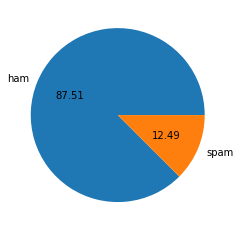

In [16]:
#creating pie chart to visualize the distribution of values in the 'detect' for ham and spam sms data
plt.pie(df['detect'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
#show thepie chart
plt.show()

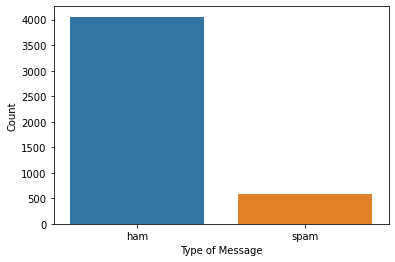

In [17]:
#generating a bar chart of the 'detect' column in the DataFrame 'df' using Seaborn's countplot() function
sns.countplot(data=df, x='detect')
plt.xlabel('Type of Message')
plt.ylabel('Count')
plt.xticks([0, 1], ['ham', 'spam'])
plt.show()

In [18]:
#adding a new column to the DataFrame containing the number of characters in each sms
df['character_number'] = df['sms'].apply(len)

In [19]:
df.sample(7)

,detect,sms,character_number
3728,0,"Aight I've been set free, think you could text...",138
2067,0,"Alright, see you in a bit",25
627,0,Yup i thk they r e teacher said that will make...,102
1066,0,Oh:)as usual vijay film or its different?,41
970,1,We know someone who you know that fancies you....,101
4713,0,\OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE ...,112
1532,0,Ok no prob... I'll come after lunch then...,43


In [20]:
#adding a new column to the DataFrame containing the number of words in each sms
df['word_number'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.sample(7)

,detect,sms,character_number,word_number
2375,0,"Em, its olowoyey@ usc.edu have a great time in...",107,22
296,0,Unless it's a situation where YOU GO GURL woul...,67,13
4522,0,I want to go to perumbavoor,27,6
4870,1,You have 1 new message. Call 0207-083-6089,42,8
666,0,Carlos'll be here in a minute if you still nee...,54,13
576,0,I'm tired of arguing with you about this week ...,109,28
1925,0,"Not much, just some textin'. How bout you?",42,12


In [22]:
#adding a new column to the DataFrame containing the number of sentences in each sms
df['sentence_number'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.sample(7)

,detect,sms,character_number,word_number,sentence_number
1427,1,HOT LIVE FANTASIES call now 08707509020 Just 2...,122,25,1
1118,0,I was up all night too worrying about this app...,133,30,2
2092,1,Fantasy Football is back on your TV. Go to Sky...,164,35,3
2564,0,Nice.nice.how is it working?,28,5,1
823,1,25p 4 alfie Moon's Children in need song on ur...,161,36,3
1306,0,i dnt wnt to tlk wid u,22,7,1
4679,1,Our records indicate u maybe entitled to 5000 ...,156,32,3


In [24]:
#generating descriptive statistics for the 'character_number', 'word_number', and 'sentence_number'
df[['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,4636.000000,4636.000000,4636.000000
mean,78.842752,18.374029,1.959016
std,57.605103,13.132151,1.441279
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#generating descriptive statistics of HAM records for the 'character_number', 'word_number', and 'sentence_number'
df[df['detect'] == 0][['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,4057.000000,4057.000000,4057.000000
mean,70.372443,17.054967,1.813655
std,55.511718,13.261543,1.373452
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# #generating descriptive statistics of SPAM records for the 'character_number', 'word_number', and 'sentence_number'
df[df['detect'] == 1][['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,579.000000,579.000000,579.000000
mean,138.193437,27.616580,2.977547
std,30.880065,7.141535,1.494342
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


<AxesSubplot:xlabel='character_number', ylabel='Count'>

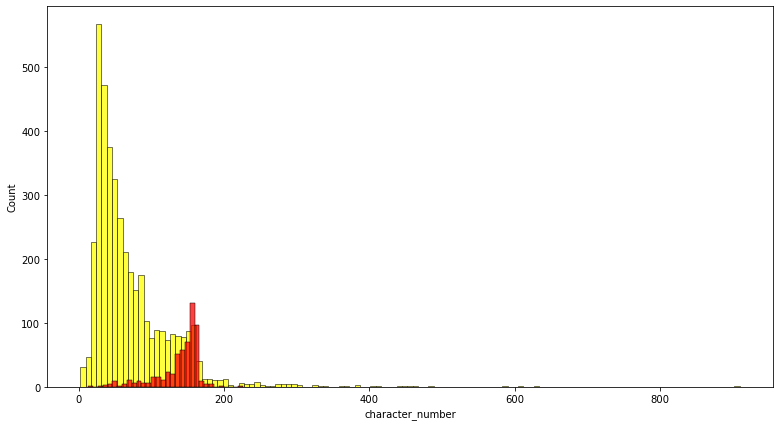

In [27]:
#Creating a figure with a specific size and generate two histograms of character counts for 'ham' and 'spam'
plt.figure(figsize=(13,7))
sns.histplot(df[df['detect'] == 0]['character_number'],color='yellow')
sns.histplot(df[df['detect'] == 1]['character_number'],color='red')

<AxesSubplot:xlabel='word_number', ylabel='Count'>

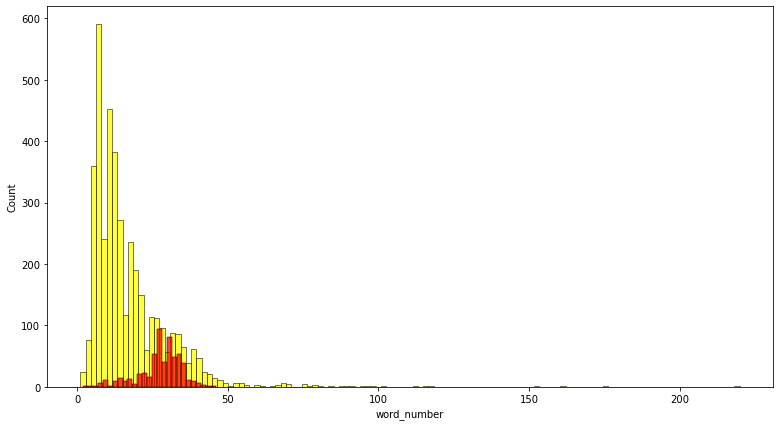

In [28]:
plt.figure(figsize=(13,7))
sns.histplot(df[df['detect'] == 0]['word_number'],color='yellow')
sns.histplot(df[df['detect'] == 1]['word_number'],color='red')

<AxesSubplot:xlabel='sentence_number', ylabel='Count'>

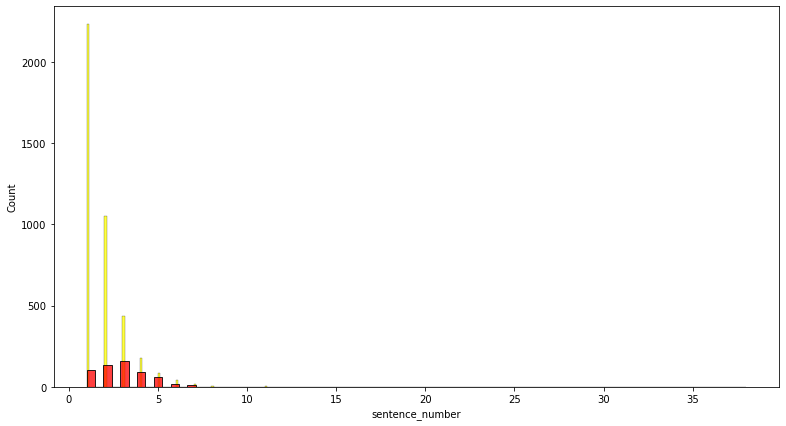

In [29]:
plt.figure(figsize=(13,7))
sns.histplot(df[df['detect'] == 0]['sentence_number'],color='yellow')
sns.histplot(df[df['detect'] == 1]['sentence_number'],color='red')

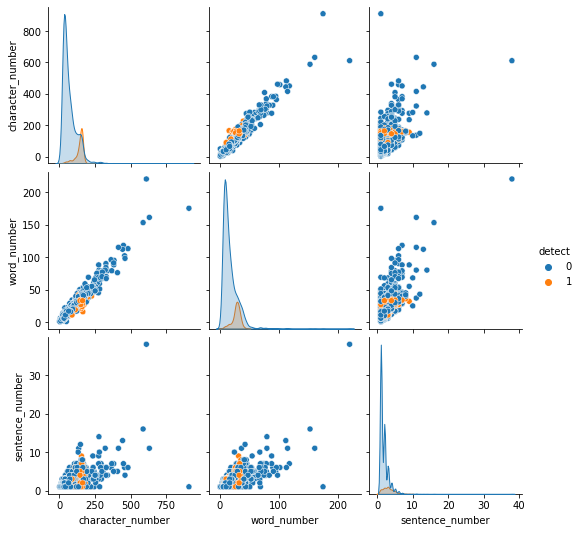

In [30]:
#generating a pair plot using Seaborn's pairplot() function, with 'detect' used to differentiate between 'ham' and 'spam' messages
sns.pairplot(df,hue='detect')


<AxesSubplot:>

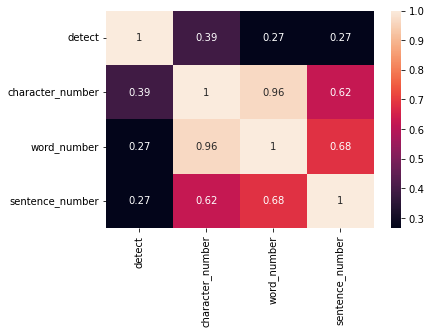

In [31]:
#generating heatmap of the correlation matrix using Seaborn's heatmap() function, with numerical values displayed on the plot
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [32]:
ps = PorterStemmer()
def transform_sms(sms):
    # Convert the string to lowercase
    sms = sms.lower()
    # Tokenize the string into words
    sms = nltk.word_tokenize(sms)
    
    # Remove non-alphanumeric characters
    y = []
    for i in sms:
        if i.isalnum():
            y.append(i)
    
    # Remove stopwords and punctuation
    sms = y[:]
    y.clear()
    
    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # Apply stemming to reduce words to their base form
    sms = y[:]
    y.clear()
    
    for i in sms:
        y.append(ps.stem(i))
    
    # Join the words back into a single string        
    return " ".join(y)

In [33]:
df['transformed_sms'] = df['sms'].apply(transform_sms)

In [34]:
df.sample(7)

,detect,sms,character_number,word_number,sentence_number,transformed_sms
872,1,Ur cash-balance is currently 500 pounds - to m...,137,26,2,ur current 500 pound maxim ur send go 86688 cc...
795,0,it's really getting me down just hanging around.,48,10,1,realli get hang around
1451,0,Pls pls find out from aunt nike.,32,8,1,pl pl find aunt nike
3942,0,Haiyoh... Maybe your hamster was jealous of mi...,51,9,1,haiyoh mayb hamster jealou million
2664,0,And stop wondering \wow is she ever going to s...,137,33,2,stop wonder ever go stop tm whenev want mine l...
1362,0,I jus hope its true that missin me cos i'm re...,115,27,2,ju hope true missin co realli missin done anyt...
270,0,"Come to mu, we're sorting out our narcotics si...",53,11,1,come mu sort narcot situat


In [35]:
#A WordCloud object is created with a width of 600 pixels, height of 600 pixels, a minimum font size of 12 pixels, and a white background color
wc = WordCloud(width=600,height=600,min_font_size=12,background_color='white')
#The generate method of the WordCloud object is called with the transformed SMS messages that are classified as spam.
spam_wc = wc.generate(df[df['detect'] == 1]['transformed_sms'].str.cat(sep=" "))

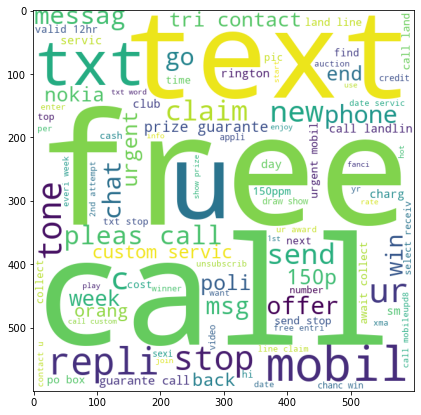

In [36]:
#A figure object with a width of 16 inches and height of 7 inches is created using the figure method of the pyplot module
plt.figure(figsize=(16,7))
#The resulting image is shown in the output by passinf the spam_wc variable
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(df[df['detect'] == 0]['transformed_sms'].str.cat(sep=" "))

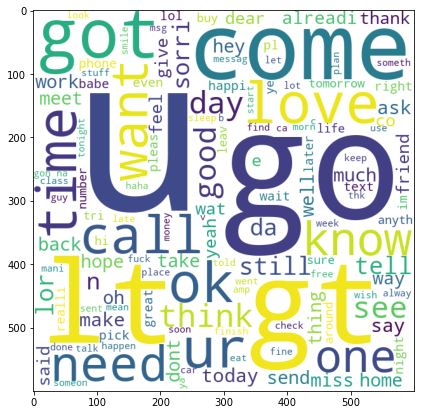

In [38]:
plt.figure(figsize=(16,7))
plt.imshow(ham_wc)

In [39]:
#creates an empty list
spam_corpus = []
#initiates a for loop that iterates through each transformed text message where detect is a spam
for msg in df[df['detect'] == 1]['transformed_sms'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
#Total number of detected spam words
len(spam_corpus)

8782

/Users/debmalyadeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


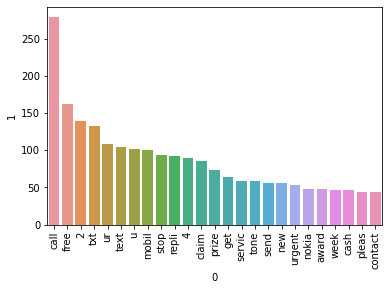

In [41]:
#creates a barplot using Seaborn library with most common 25 spam words
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(25))[0],pd.DataFrame(Counter(spam_corpus).most_common(25))[1])
#rotates the x-axis tick labels vertically
plt.xticks(rotation='vertical')
#shows the plot
plt.show()

In [42]:
#creates an empty list
ham_corpus = []
#initiates a for loop that iterates through each transformed text message
for msg in df[df['detect'] == 0]['transformed_sms'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
#Total number of detected ham words
len(ham_corpus)

31659

/Users/debmalyadeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


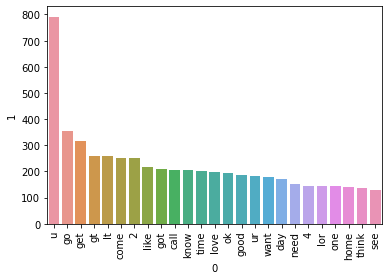

In [44]:
#creates a barplot using Seaborn library with most common 25 ham words
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(25))[0],pd.DataFrame(Counter(ham_corpus).most_common(25))[1])
#rotates the x-axis tick labels vertically
plt.xticks(rotation='vertical')
#shows the plot
plt.show()

# Model Building

Using CountVectorizer

In [45]:
cv = CountVectorizer()

In [46]:
X = cv.fit_transform(df['transformed_sms']).toarray()

In [47]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
X.shape

(4636, 6294)

In [49]:
y = df['detect'].values

In [50]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
#create three different Naive Bayes classifiers, each with a different assumption about the distribution of the input features
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB Accuracy is ",accuracy_score(y_test,y_pred1))
print("GaussianNB Precision is ",precision_score(y_test,y_pred1))
print("GaussianNB F1 Score is ",f1_score(y_test,y_pred1))
print("GaussianNB Recall Score is ",recall_score(y_test,y_pred1))

GaussianNB Accuracy is  0.8583752695902228
GaussianNB Precision is  0.48632218844984804
GaussianNB F1 Score is  0.6189555125725339
GaussianNB Recall Score is  0.851063829787234


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB Accuracy Score is ",accuracy_score(y_test,y_pred2))
print("MultinomialNB Precision Score is ",precision_score(y_test,y_pred2))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred2))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred2))

MultinomialNB Accuracy Score is  0.9762760603882099
MultinomialNB Precision Score is  0.9057591623036649
MultinomialNB F1 Score is  0.9129287598944592
MultinomialNB Recall Score is  0.9202127659574468


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("BernoulliNB Accuracy is ",accuracy_score(y_test,y_pred3))
print("BernoulliNB Precision is ",precision_score(y_test,y_pred3))
print("BernoulliNB F1 Score is ",f1_score(y_test,y_pred3))
print("BernoulliNB Recall Score is ",recall_score(y_test,y_pred3))


BernoulliNB Accuracy is  0.9626168224299065
BernoulliNB Precision is  0.9657534246575342
BernoulliNB F1 Score is  0.8443113772455089
BernoulliNB Recall Score is  0.75


# Using TfidfVectorizer

In [192]:
#creates a TfidfVectorizer object, which is used to transform the text data into a numerical representation that can be used in machine learning algorithms
tfidf = TfidfVectorizer()

Using TfidfVectorizer where max_features=3000

In [129]:
#TfidfVectorizer object will include only the 3000 most frequently occurring words in the corpus,
tfidf = TfidfVectorizer(max_features=3000)

In [193]:
#transform the preprocessed text data (df['transformed_sms']) into a numerical feature matrix (X)
X = tfidf.fit_transform(df['transformed_sms']).toarray()

In [194]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
#Shape of the X variable
X.shape

(4636, 6294)

In [196]:
#creates a NumPy array y containing the values of the 'detect' column from the DataFrame df
y = df['detect'].values

In [197]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [198]:
#splitting a dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [199]:
X_train.shape

(3245, 6294)

In [200]:
X_test.shape

(1391, 6294)

In [138]:
#fit the Gaussian Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
gnb.fit(X_train,y_train)
#The predictions are stored in the y_pred1 variable.
y_pred1 = gnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("GaussianNB Accuracy is ",accuracy_score(y_test,y_pred1))
print("GaussianNB Precision is ",precision_score(y_test,y_pred1))
print("GaussianNB F1 Score is ",f1_score(y_test,y_pred1))
print("GaussianNB Recall Score is ",recall_score(y_test,y_pred1))


GaussianNB Accuracy is  0.8519051042415529
GaussianNB Precision is  0.4722222222222222
GaussianNB F1 Score is  0.5976562499999999
GaussianNB Recall Score is  0.8138297872340425


In [139]:
#fit the Multinomial Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
mnb.fit(X_train,y_train)
#The predictions are stored in the y_pred2 variable.
y_pred2 = mnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("MultinomialNB Accuracy Score is ",accuracy_score(y_test,y_pred2))
print("MultinomialNB Precision Score is ",precision_score(y_test,y_pred2))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred2))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred2))

MultinomialNB Accuracy Score is  0.9690869877785766
MultinomialNB Precision Score is  0.9931972789115646
MultinomialNB F1 Score is  0.8716417910447762
MultinomialNB Recall Score is  0.776595744680851


In [140]:
#fit the Bernoulli Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
bnb.fit(X_train,y_train)
#The predictions are stored in the y_pred3 variable.
y_pred3 = bnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("BernoulliNB Accuracy is ",accuracy_score(y_test,y_pred3))
print("BernoulliNB Precision is ",precision_score(y_test,y_pred3))
print("BernoulliNB F1 Score is ",f1_score(y_test,y_pred3))
print("BernoulliNB Recall Score is ",recall_score(y_test,y_pred3))


BernoulliNB Accuracy is  0.9726815240833933
BernoulliNB Precision is  0.96875
BernoulliNB F1 Score is  0.8908045977011495
BernoulliNB Recall Score is  0.824468085106383


# DecisionTreeClassifier, RandomForestClassifier And Naive Bayes comparison

In [141]:
#Creates an instance of the DecisionTreeClassifier class with a maximum depth of 5
dtc = DecisionTreeClassifier(max_depth=5)
#Creates an instance of# DecisionTreeClassifier, RandomForestClassifier And Naive Bayes comparison the RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

In [142]:
#creates a dictionary clfs that maps the names of different classifiers to the actual classifier objects
clfs = {
    'DecisionTreeClassifier': dtc,
    'RandomForestClassifier': rfc,
    'Naive_Bayes':mnb
}

In [143]:
#defines a function called train_classifier that takes in five arguments
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,f1,recall

In [144]:
#calling the train_classifier function with the dtc arugument
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.9324227174694465,
 0.8916666666666667,
 0.6948051948051949,
 0.5691489361702128)

In [145]:
#calling the train_classifier function with the rfc arugument
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.9734004313443566,
 0.9934640522875817,
 0.8914956011730205,
 0.8085106382978723)

In [146]:
#creates three empty lists to store the accuracy and precision scores for each classifier
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
#iterates over the items in the clfs dictionary, which contains the names of the classifiers as keys and the classifier objects as values
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 Score - ",current_f1)
    print("Recall Score - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)
    

For  DecisionTreeClassifier
Accuracy -  0.9324227174694465
Precision -  0.8852459016393442
F1 Score -  0.6967741935483872
Recall Score -  0.574468085106383
For  RandomForestClassifier
Accuracy -  0.9734004313443566
Precision -  0.9934640522875817
F1 Score -  0.8914956011730205
Recall Score -  0.8085106382978723
For  Naive_Bayes
Accuracy -  0.9690869877785766
Precision -  0.9931972789115646
F1 Score -  0.8716417910447762
Recall Score -  0.776595744680851


In [124]:
#creates a pandas DataFrame object

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1':f1_scores, 'Recall':recall_scores}).sort_values('Precision',ascending=False)



In [125]:
performance_df

,Algorithm,Accuracy,Precision,F1,Recall
2,Naive_Bayes,0.943925,1.000000,0.738255,0.585106
1,RandomForestClassifier,0.966211,0.993007,0.858006,0.755319
0,DecisionTreeClassifier,0.936017,0.902439,0.713826,0.590426


In [126]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [127]:
performance_df1

,Algorithm,variable,value
0,Naive_Bayes,Accuracy,0.943925
1,RandomForestClassifier,Accuracy,0.966211
2,DecisionTreeClassifier,Accuracy,0.936017
3,Naive_Bayes,Precision,1.000000
4,RandomForestClassifier,Precision,0.993007
5,DecisionTreeClassifier,Precision,0.902439
6,Naive_Bayes,F1,0.738255
7,RandomForestClassifier,F1,0.858006
8,DecisionTreeClassifier,F1,0.713826
9,Naive_Bayes,Recall,0.585106


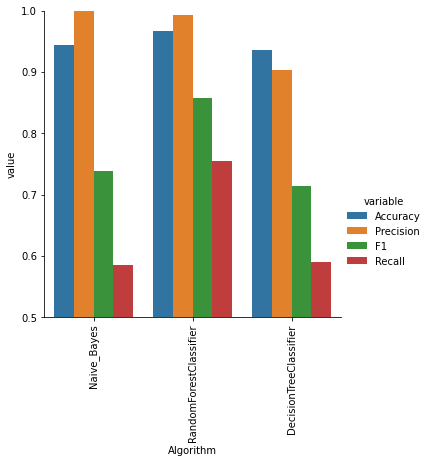

In [128]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Set the max_features parameter to 3000 of TfIdf

In [147]:
#creates a new DataFrame temp_df with four columns: 'Algorithm', 'Accuracy_max_ft_3000', 'Precision_max_ft_3000', and 'F1_max_ft_3000'
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'F1_max_ft_3000':f1_scores, 'Recall_max_ft_3000':recall_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [148]:
#merges the two DataFrames performance_df and temp_df on the 'Algorithm' column and creates a new DataFrame new_df.
new_df = performance_df.merge(temp_df,on='Algorithm')

In [149]:
new_df

,Algorithm,Accuracy,Precision,F1,Recall,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,Naive_Bayes,0.943925,1.000000,0.738255,0.585106,0.969087,0.993197,0.871642,0.776596
1,RandomForestClassifier,0.966211,0.993007,0.858006,0.755319,0.973400,0.993464,0.891496,0.808511
2,DecisionTreeClassifier,0.936017,0.902439,0.713826,0.590426,0.932423,0.885246,0.696774,0.574468


# DecisionTreeClassifier, RandomForestClassifier using Xgboost

In [150]:
import xgboost as xgb

# Initializes an instance of the XGBClassifier class with a maximum depth of 5
xgb_dtc = xgb.XGBClassifier(max_depth=5)

# Initializes an instance of the XGBClassifier class with 50 estimators and random state 42
xgb_rf = xgb.XGBRFClassifier(n_estimators=50, random_state=42)


In [151]:
#creates a dictionary clfs that maps the names of different classifiers to the actual classifier objects
clfs1 = {
    'xgboost_DecisionTreeClassifier': xgb_dtc,
    'xgboost_RandomForestClassifier': xgb_rf,
}

# Using TfidfVectorizer

In [152]:
#creates a TfidfVectorizer object, which is used to transform the text data into a numerical representation that can be used in machine learning algorithms
tfidf = TfidfVectorizer()


# Using TfidfVectorizer where max_features=3000

In [165]:
#TfidfVectorizer object will include only the 3000 most frequently occurring words in the corpus,
tfidf = TfidfVectorizer(max_features=3000)

In [166]:
#transform the preprocessed text data (df['transformed_sms']) into a numerical feature matrix (X)
X = tfidf.fit_transform(df['transformed_sms']).toarray()

In [167]:
#creates a NumPy array y containing the values of the 'target' column from the DataFrame df
y = df['detect'].values

In [168]:
#splitting a dataset into training and testing sets. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [169]:
#defines a function called train_classifier that takes in five arguments
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,f1,recall

In [170]:
#calling the train_classifier function with the xgb_dtc arugument
train_classifier(xgb_dtc,X_train,y_train,X_test,y_test)

(0.9734004313443566, 0.968944099378882, 0.8939828080229226, 0.8297872340425532)

In [171]:
#calling the train_classifier function with the xgb_rf arugument
train_classifier(xgb_rf,X_train,y_train,X_test,y_test)

(0.9388928828181164,
 0.8992248062015504,
 0.7318611987381703,
 0.6170212765957447)

In [172]:
#creates three empty lists to store the accuracy and precision scores for each classifier
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
#iterates over the items in the clfs1 dictionary, which contains the names of the classifiers as keys and the classifier objects as values
for name,clf in clfs1.items():
    
    current_accuracy,current_precision,current_f1,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 Score - ",current_f1)
    print("Recall Score - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)
    

For  xgboost_DecisionTreeClassifier
Accuracy -  0.9734004313443566
Precision -  0.968944099378882
F1 Score -  0.8939828080229226
Recall Score -  0.8297872340425532
For  xgboost_RandomForestClassifier
Accuracy -  0.9388928828181164
Precision -  0.8992248062015504
F1 Score -  0.7318611987381703
Recall Score -  0.6170212765957447


In [160]:
#creates a pandas DataFrame object

xgb_performance_df = pd.DataFrame({'Algorithm':clfs1.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1':f1_scores, 'Recall' :recall_scores}).sort_values('Precision',ascending=False)



In [161]:
xgb_performance_df

,Algorithm,Accuracy,Precision,F1,Recall
0,xgboost_DecisionTreeClassifier,0.973400,0.974843,0.893372,0.824468
1,xgboost_RandomForestClassifier,0.943206,0.916031,0.752351,0.638298


In [162]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
xgb_performance_df1 = pd.melt(xgb_performance_df, id_vars = "Algorithm")


In [163]:
xgb_performance_df1

,Algorithm,variable,value
0,xgboost_DecisionTreeClassifier,Accuracy,0.973400
1,xgboost_RandomForestClassifier,Accuracy,0.943206
2,xgboost_DecisionTreeClassifier,Precision,0.974843
3,xgboost_RandomForestClassifier,Precision,0.916031
4,xgboost_DecisionTreeClassifier,F1,0.893372
5,xgboost_RandomForestClassifier,F1,0.752351
6,xgboost_DecisionTreeClassifier,Recall,0.824468
7,xgboost_RandomForestClassifier,Recall,0.638298


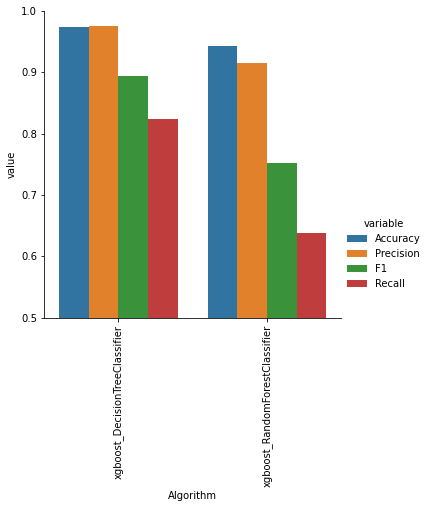

In [164]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=xgb_performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Set the max_features parameter to 3000 of TfIdf


In [173]:
#creates a new DataFrame temp_df with four columns: 'Algorithm', 'Accuracy_max_ft_3000', 'Precision_max_ft_3000', and 'F1_max_ft_3000'
xgb_temp_df = pd.DataFrame({'Algorithm':clfs1.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'F1_max_ft_3000':f1_scores, 'Recall_max_ft_3000':recall_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [174]:
xgb_temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,xgboost_DecisionTreeClassifier,0.973400,0.968944,0.893983,0.829787
1,xgboost_RandomForestClassifier,0.938893,0.899225,0.731861,0.617021


In [175]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
xgb_temp_df1 = pd.melt(xgb_temp_df, id_vars = "Algorithm")


In [176]:
xgb_temp_df1

,Algorithm,variable,value
0,xgboost_DecisionTreeClassifier,Accuracy_max_ft_3000,0.973400
1,xgboost_RandomForestClassifier,Accuracy_max_ft_3000,0.938893
2,xgboost_DecisionTreeClassifier,Precision_max_ft_3000,0.968944
3,xgboost_RandomForestClassifier,Precision_max_ft_3000,0.899225
4,xgboost_DecisionTreeClassifier,F1_max_ft_3000,0.893983
5,xgboost_RandomForestClassifier,F1_max_ft_3000,0.731861
6,xgboost_DecisionTreeClassifier,Recall_max_ft_3000,0.829787
7,xgboost_RandomForestClassifier,Recall_max_ft_3000,0.617021


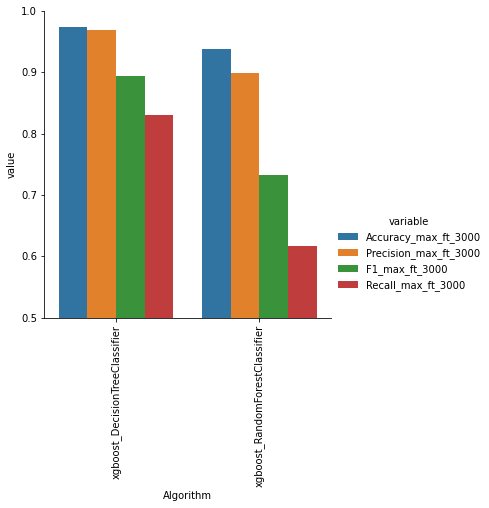

In [177]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=xgb_temp_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [178]:
#merges the two DataFrames performance_df and temp_df on the 'Algorithm' column and creates a new DataFrame new_df.
xgb_new_df = xgb_performance_df.merge(xgb_temp_df,on='Algorithm')

In [179]:
xgb_new_df

,Algorithm,Accuracy,Precision,F1,Recall,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,xgboost_DecisionTreeClassifier,0.973400,0.974843,0.893372,0.824468,0.973400,0.968944,0.893983,0.829787
1,xgboost_RandomForestClassifier,0.943206,0.916031,0.752351,0.638298,0.938893,0.899225,0.731861,0.617021


In [180]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
xgb_temp_df2 = pd.melt(xgb_new_df, id_vars = "Algorithm")


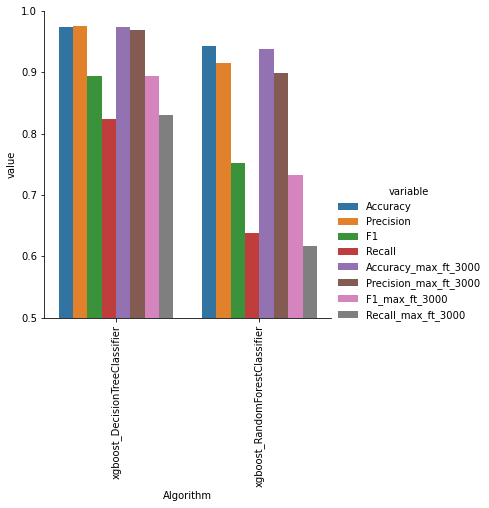

In [181]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=xgb_temp_df2, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()